### Downloading necessary libreries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Exploratory Data Analysis (EDA)

In [3]:
# Display basic information and statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


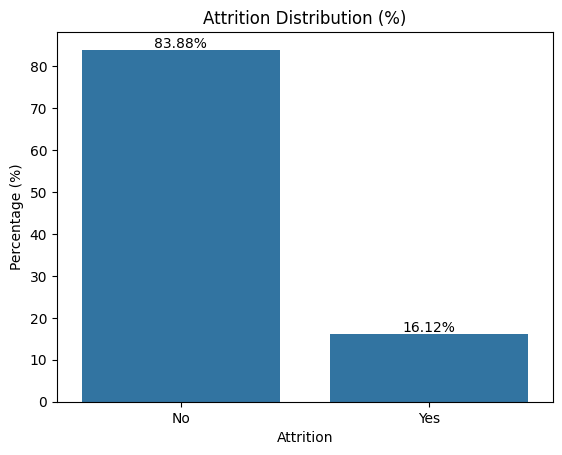

In [5]:
# Visualize Attrition Distribution
# Calculate the percentage of attrition
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

# Convert to DataFrame for easy plotting
attrition_percent_df = attrition_counts.reset_index()
attrition_percent_df.columns = ['Attrition', 'Percentage']

# Visualize Attrition Distribution
# Plot the percentage of attrition
sns.barplot(x='Attrition', y='Percentage', data=attrition_percent_df)
plt.title('Attrition Distribution (%)')
plt.ylabel('Percentage (%)')

# Add percentage annotations on the bars
for index, row in attrition_percent_df.iterrows():
    plt.text(row.name, row.Percentage + 0.5, f'{row.Percentage:.2f}%', ha='center', color='black')

plt.show()

More than 16% of the employees It corresponds to the average rate of attrition in high tech industry. But attrition rate over 15% shows, that there could be some issues in onboarding and retention process.

<ipython-input-6-1e537d4d8995>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby('AgeBin')['Attrition'].value_counts(normalize=True).unstack() * 100


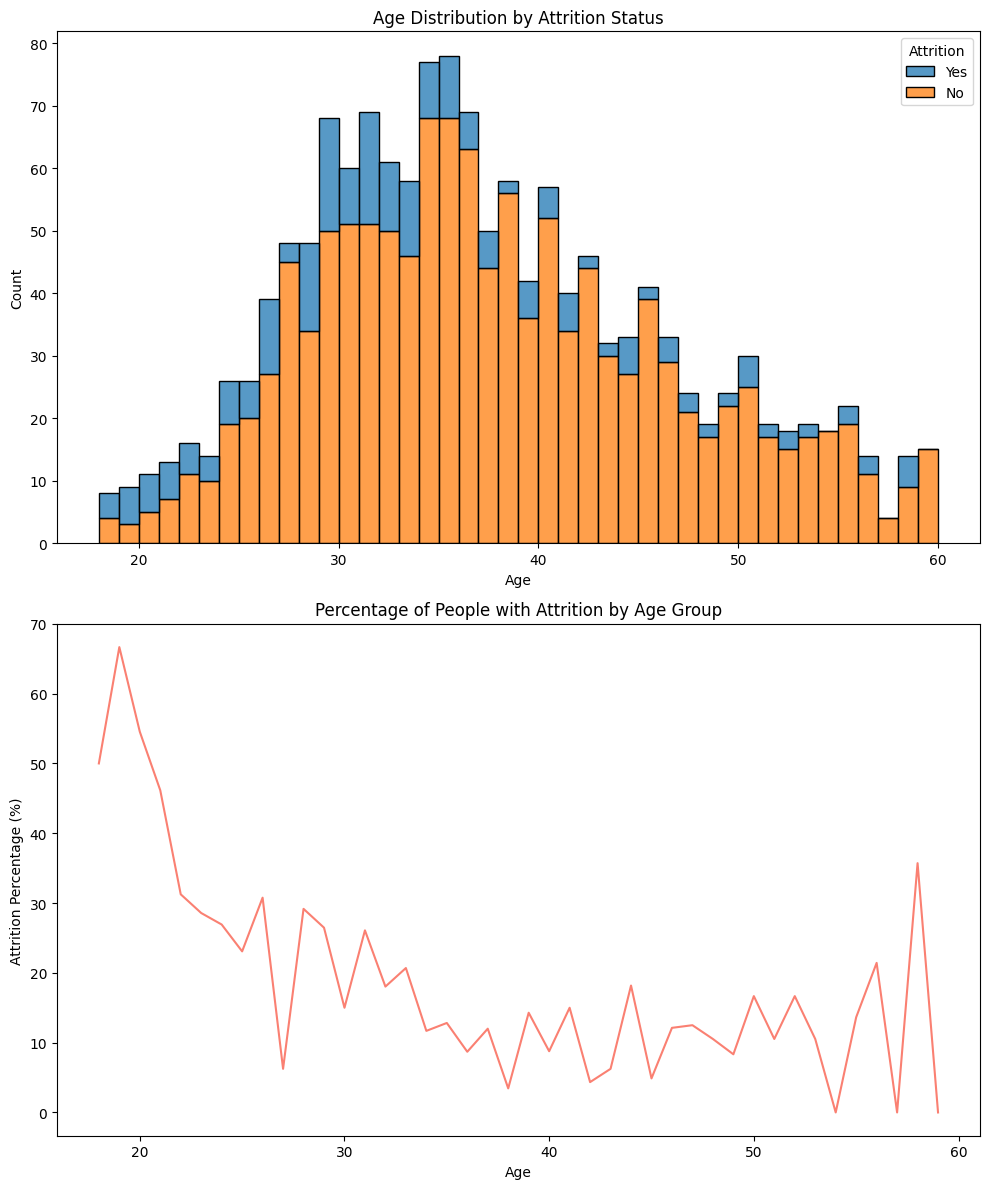

In [6]:
# Set the number of bins
bins = np.arange(df['Age'].min(), df['Age'].max() + 1, 1)

# Calculate the percentage of attrition within each age bin
df['AgeBin'] = pd.cut(df['Age'], bins=bins, right=False, include_lowest=True)
age_attrition = df.groupby('AgeBin')['Attrition'].value_counts(normalize=True).unstack() * 100
attrition_percent = age_attrition['Yes'].reset_index()

# Create a subplot with 2 plots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Histogram showing distribution of age by attrition status
sns.histplot(df, x='Age', hue='Attrition', multiple='stack', bins=bins, ax=ax[0])
ax[0].set_title('Age Distribution by Attrition Status')

# Plot 2: Bar plot showing the percentage of people with attrition in each age group
sns.lineplot(x=attrition_percent['AgeBin'].apply(lambda x: x.left), y='Yes', data=attrition_percent, ax=ax[1], color='salmon')
ax[1].set_title('Percentage of People with Attrition by Age Group')
ax[1].set_ylabel('Attrition Percentage (%)')
ax[1].set_xlabel('Age')

plt.tight_layout()
plt.show()

Here we can see, that attrition is higher in younger and older employees. Actually, the age group between 30 and 40, which is our majority, shows less level of attrition.

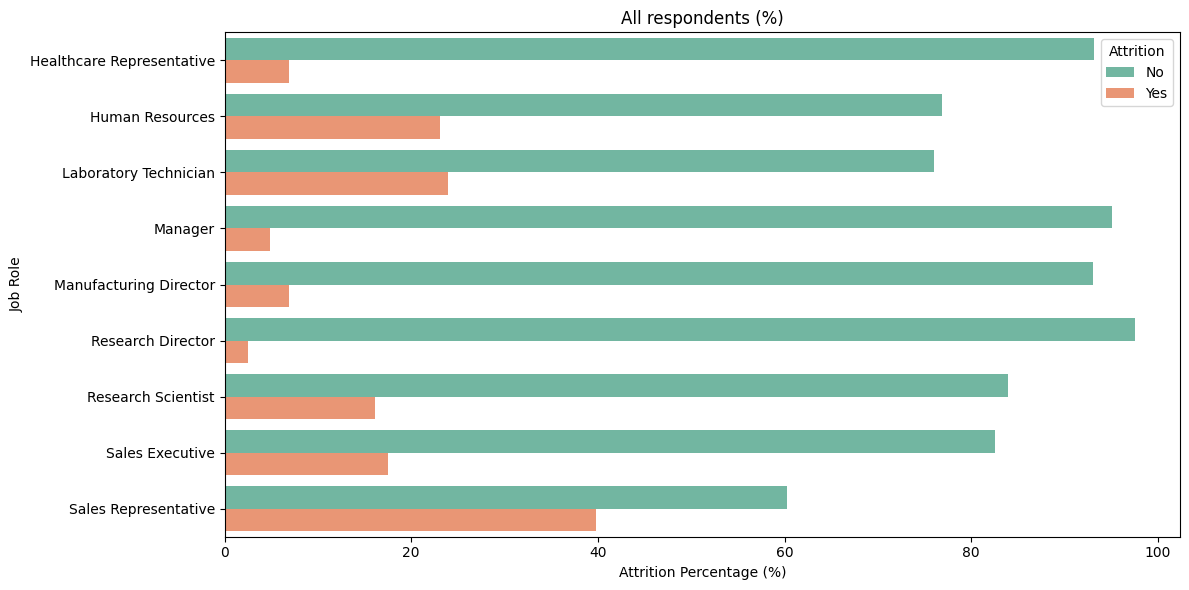

In [7]:
# Visualize attrition by Job Role
# Calculate the percentage of attrition within each job role
job_role_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100

# Convert the DataFrame to long format for easier plotting
attrition_percent_by_job = job_role_attrition.reset_index().melt(id_vars='JobRole', var_name='Attrition', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='JobRole', hue='Attrition', data=attrition_percent_by_job, palette='Set2')

plt.title('All respondents (%)')
plt.xlabel('Attrition Percentage (%)')
plt.ylabel('Job Role')
plt.legend(title='Attrition')

plt.tight_layout()
plt.show()

The highest level of attrition is inside **sales reps** - 40%. It's quite common, cause it's a very stressfull job with a lot of inside and outside competitions to meet everyday. Also an Alarm level of attrition - more than 20% - we can see inside **Laboratory technicians** and **HR departments**. That are the 3 main titles, on which wee need to concentrate.

Also high, but not alarm level, there is among **research scientists and sales executives**.

Other titles has low level of attrition

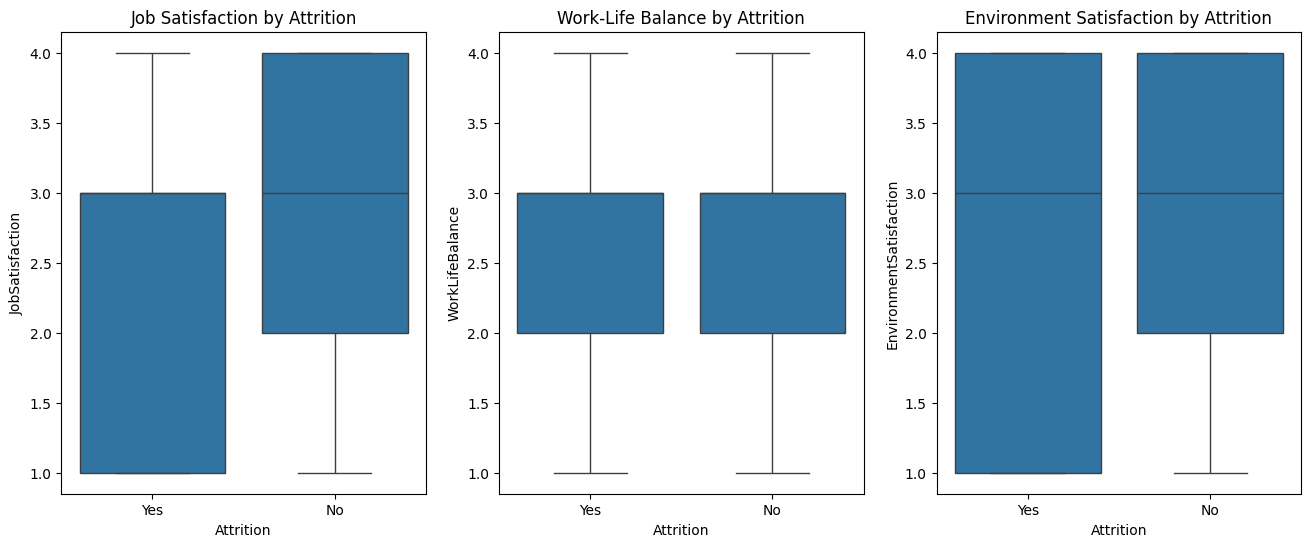

In [8]:
# Visualize Job Satisfaction and Work-Life Balance Impact on Attrition
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, ax=ax[0])
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=df, ax=ax[1])
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df, ax=ax[2])
ax[0].set_title('Job Satisfaction by Attrition')
ax[1].set_title('Work-Life Balance by Attrition')
ax[2].set_title('Environment Satisfaction by Attrition')
plt.show()

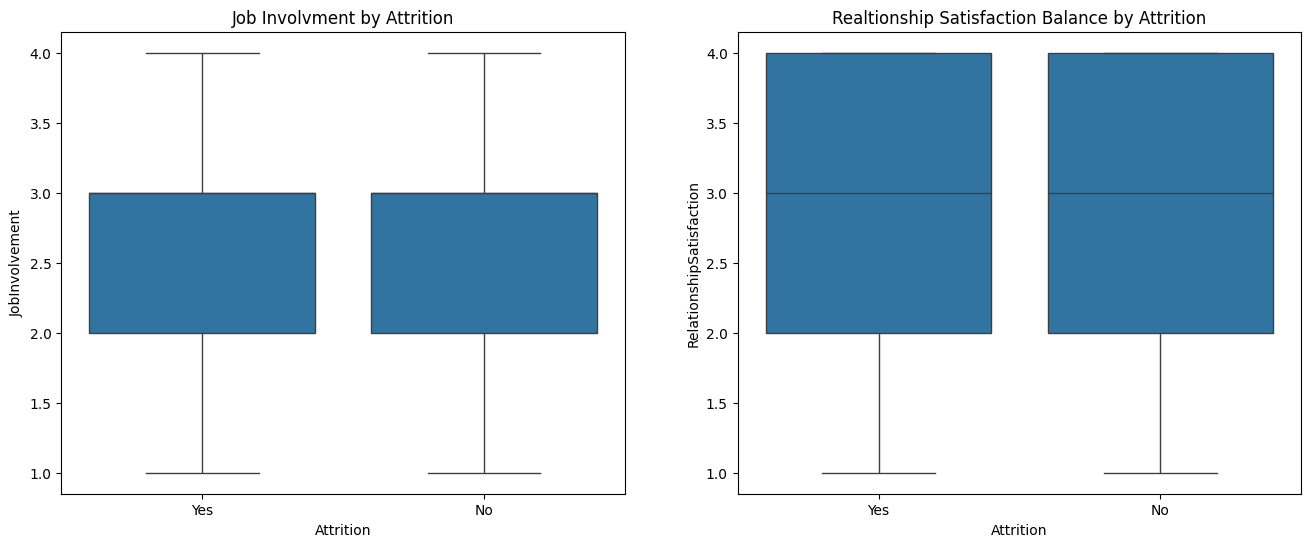

In [9]:
# Visualize Job Involvment and Relationship Satisfaction Impact on Attrition
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='Attrition', y='JobInvolvement', data=df, ax=ax[0])
sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=df, ax=ax[1])
ax[0].set_title('Job Involvment by Attrition')
ax[1].set_title('Realtionship Satisfaction Balance by Attrition')
plt.show()

While work-life balance is quite on the same level, for people with atrition satisfaction level is much smaller. At the same time most part of people with attrition are unsutisfird with their workspace.

Relationship Satisfaction and Job Involvment level are the same for people with and without attrition.  

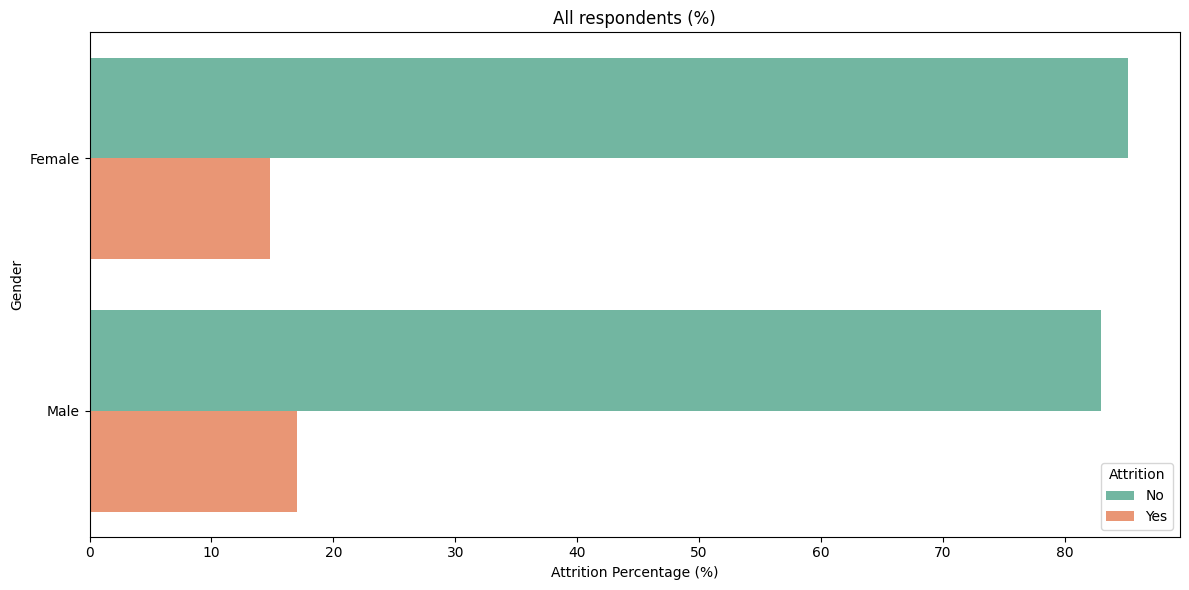

In [10]:
# Visualize attrition by Gender
# Calculate the percentage of attrition within each gender
gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100

# Convert the DataFrame to long format for easier plotting
attrition_percent_by_gender = gender_attrition.reset_index().melt(id_vars='Gender', var_name='Attrition', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='Gender', hue='Attrition', data=attrition_percent_by_gender, palette='Set2')

plt.title('All respondents (%)')
plt.xlabel('Attrition Percentage (%)')
plt.ylabel('Gender')
plt.legend(title='Attrition')

plt.tight_layout()
plt.show()

There is almost no difference in attrition level by gender, but women have slightly lover one.

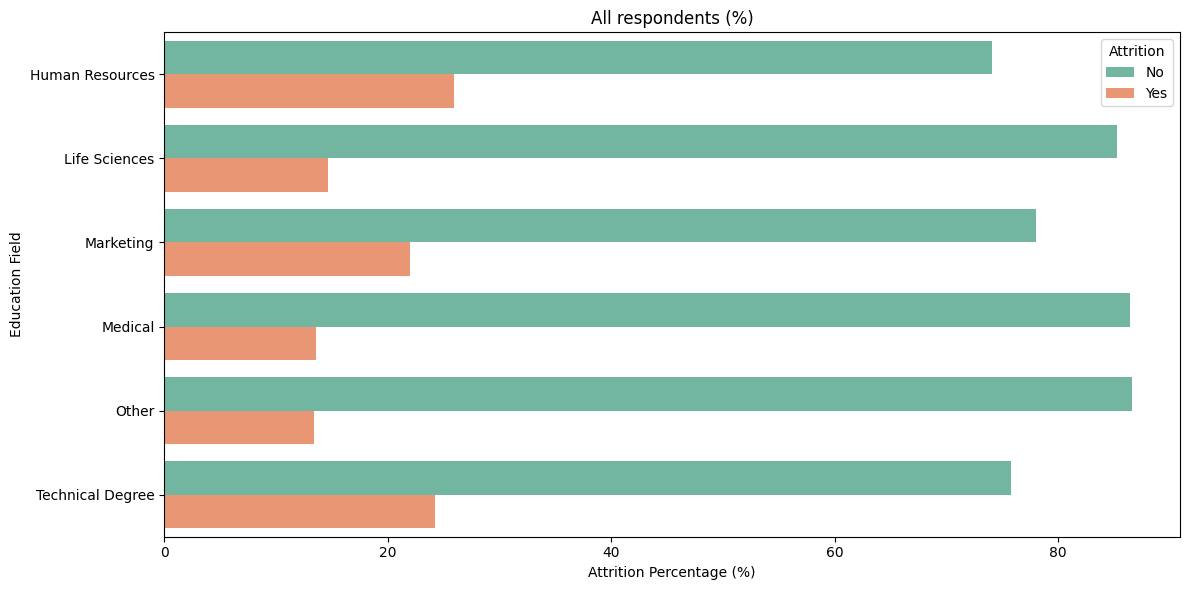

In [11]:
# Visualize attrition by Education
# Calculate the percentage of attrition within each education level
education_attrition = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack() * 100

# Convert the DataFrame to long format for easier plotting
attrition_percent_by_education = education_attrition.reset_index().melt(id_vars='EducationField', var_name='Attrition', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='EducationField', hue='Attrition', data=attrition_percent_by_education, palette='Set2')

plt.title('All respondents (%)')
plt.xlabel('Attrition Percentage (%)')
plt.ylabel('Education Field')
plt.legend(title='Attrition')

plt.tight_layout()
plt.show()

We can find out, that people with marketing and HR degree have alarm level of attrition, it can be explained with a higher level of interpersonal contacts and communication, necessary to a job. Also people with technical degree, who are working in research and labs, have an alarm level.

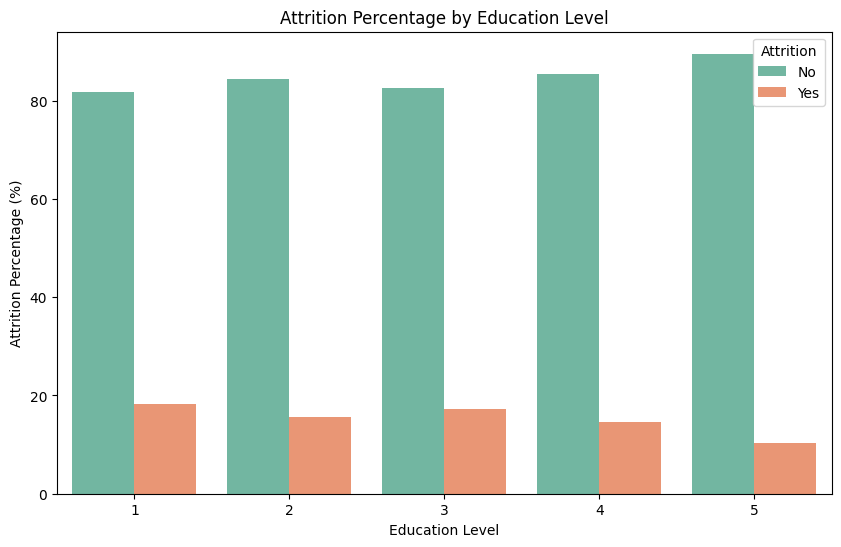

In [12]:
# Calculate the percentage of attrition within each education level
education_level_attrition = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack() * 100

# Convert the DataFrame to long format for easier plotting
attrition_percent_by_education_level = education_level_attrition.reset_index().melt(id_vars='Education', var_name='Attrition', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Percentage', hue='Attrition', data=attrition_percent_by_education_level, palette='Set2')

plt.title('Attrition Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Percentage (%)')
plt.legend(title='Attrition')

plt.show()

We can see that attrition level is slightly higher within a people with 1st and 3rd level of education. People with 5th level, who are on Senior Expert level or higher, feel less attrition, cause generally they find more satisfaction in process and result of acchevieng the goal and the field, where they are working in.

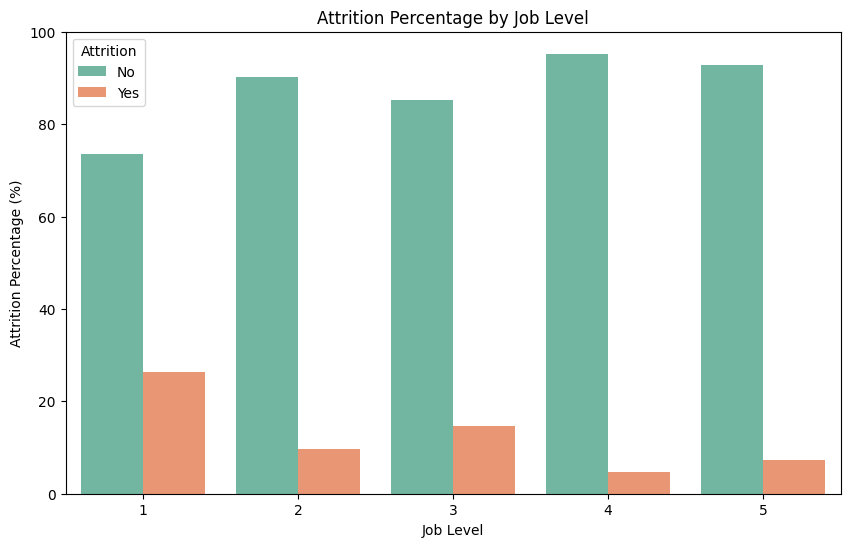

In [13]:
# Calculate the percentage of attrition within each job level
job_level_attrition = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True).unstack() * 100

# Convert the DataFrame to long format for easier plotting
attrition_percent_by_job_level = job_level_attrition.reset_index().melt(id_vars='JobLevel', var_name='Attrition', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='JobLevel', y='Percentage', hue='Attrition', data=attrition_percent_by_job_level, palette='Set2')

plt.title('Attrition Percentage by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Attrition Percentage (%)')
plt.legend(title='Attrition')

plt.show()

# We can notice, that the highest attrition rate is inside the 1st level jobs, which is quite regular for industry.

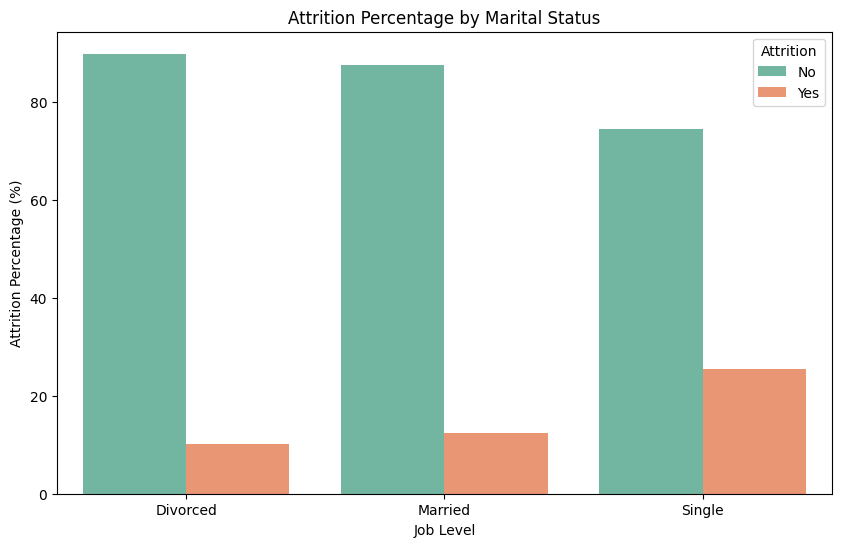

In [14]:
# Calculate the percentage of attrition within each marital status
marital_status_attrition = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack() * 100

# Convert the DataFrame to long format for easier plotting
attrition_percent_by_marital_status = marital_status_attrition.reset_index().melt(id_vars='MaritalStatus', var_name='Attrition', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalStatus', y='Percentage', hue='Attrition', data=attrition_percent_by_marital_status, palette='Set2')

plt.title('Attrition Percentage by Marital Status')
plt.xlabel('Job Level')
plt.ylabel('Attrition Percentage (%)')
plt.legend(title='Attrition')

plt.show()

Single people feel more attriction, than divorced and married. It can be explained by 2 things: they don't have somebody to spend time with (divorced people often share the time with kids with another parent, and they have something to focus on except the job.

### Data Preprocessing

In [15]:
# Handle missing data (if any)
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing values in the dataset

In [16]:
# Encode categorical variables
# List of categorical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18', 'Attrition']

# Apply LabelEncoder to each column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the encoded DataFrame
print(df.head())

# Display the mapping of original categories to their encoded values
for col, le in label_encoders.items():
    print(f"\nMapping for {col}:")
    for class_, label in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_} -> {label}")

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0        

In [17]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked', 'PercentSalaryHike', 'TrainingTimesLastYear']

# Calculate and print the mean for each column
print("Mean values before scaling:")
means = df[numerical_cols].mean()
print(means)

# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(df.head())

Mean values before scaling:
Age                          36.923810
MonthlyIncome              6502.931293
TotalWorkingYears            11.279592
YearsAtCompany                7.008163
YearsInCurrentRole            4.229252
YearsSinceLastPromotion       2.187755
YearsWithCurrManager          4.123129
NumCompaniesWorked            2.693197
PercentSalaryHike            15.209524
TrainingTimesLastYear         2.799320
dtype: float64

Normalized DataFrame:
        Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.446350          1               2       1102           2   
1  1.322365          0               1        279           1   
2  0.008343          1               2       1373           1   
3 -0.429664          0               1       1392           1   
4 -1.086676          0               2        591           1   

   DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2               1              1           

In [18]:
# Delete unnecassary columns

# Specify the columns to delete
columns_to_delete = ['AgeBin', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'DailyRate', 'MonthlyRate', 'HourlyRate', 'StandardHours']

# Delete the specified columns
df = df.drop(columns=columns_to_delete)

# Display the updated DataFrame
print(df.head())
#


        Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0  0.446350          1               2           2                 1   
1  1.322365          0               1           1                 8   
2  0.008343          1               2           1                 2   
3 -0.429664          0               1           1                 3   
4 -1.086676          0               2           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0          2               1                        2       0               3   
1          1               1                        3       1               2   
2          2               4                        4       1               2   
3          4               1                        4       0               3   
4          1               3                        1       1               3   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ... 

### Correlation and Trend Analysis

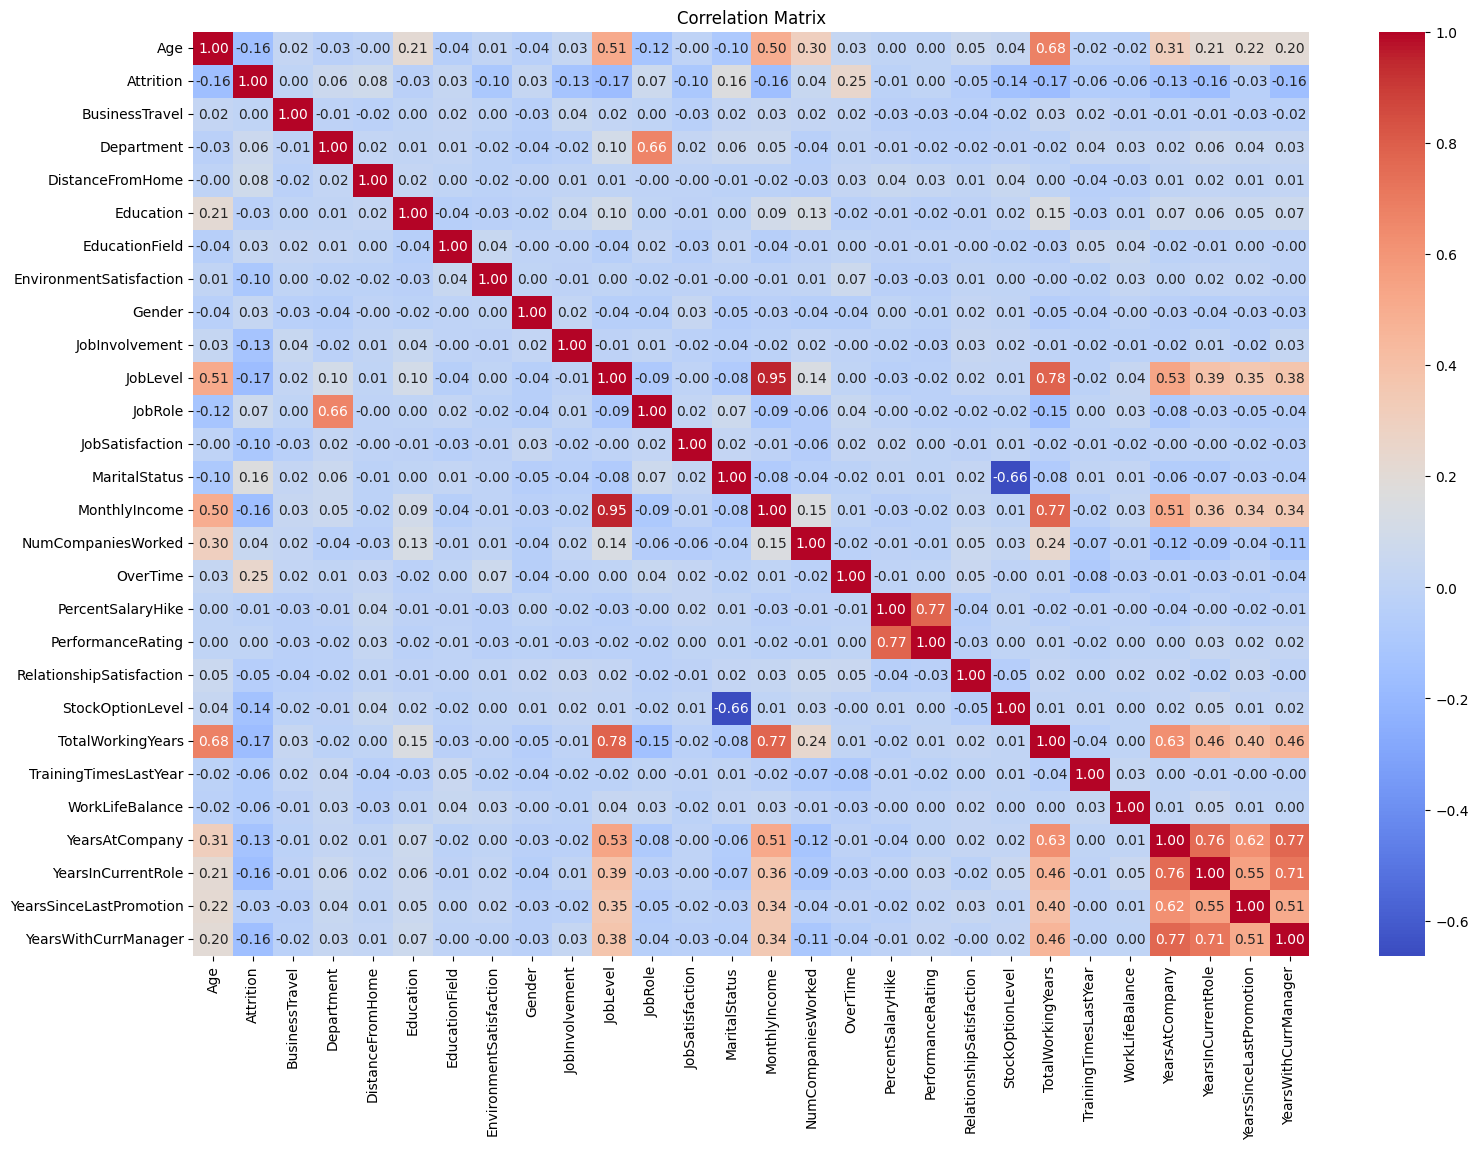

In [19]:
# Correlation matrix and heatmap
plt.figure(figsize=(18, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the Matrix we can find 2 interesting things to study:


*   The most affiliative thing on attrition is OverTime, it shows some positive correlation (but not really big)

*   All other values show mostly small negative results with  - years in current role, with current manager, total working years, Monthly Income, Job Level and Age. All of them can be combined in a claster 'experience in company'.  





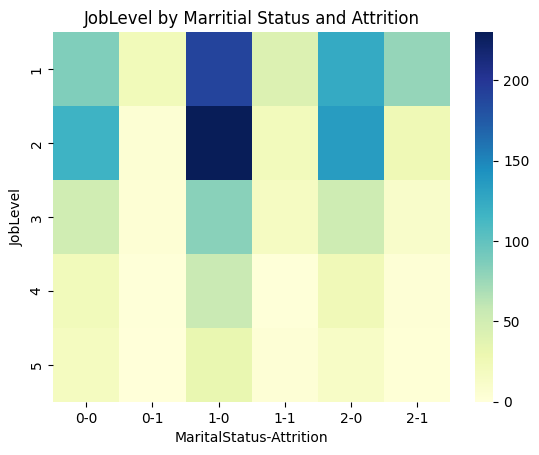

In [20]:
#Job Level by Marital Status and Attrition
df_ct = pd.crosstab(df['JobLevel'], [df['MaritalStatus'], df['Attrition']])
sns.heatmap(df_ct, cmap='YlGnBu')
plt.title('JobLevel by Marritial Status and Attrition')
plt.show()

Single entry level specialists feel attrition more often.

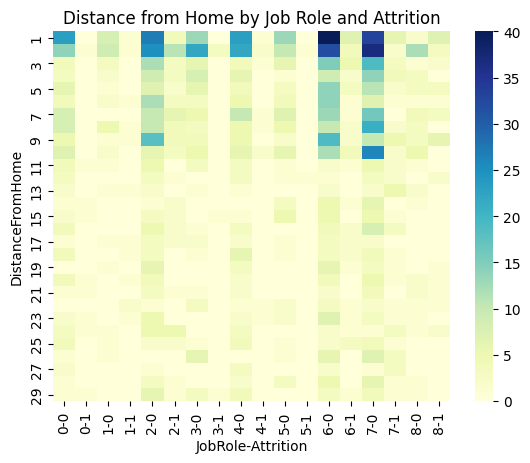

In [21]:
#Distance From Home by Job Role and Attrition
df_ct = pd.crosstab(df['DistanceFromHome'], [df['JobRole'], df['Attrition']])
sns.heatmap(df_ct, cmap='YlGnBu')
plt.title('Distance from Home by Job Role and Attrition')
plt.show()

There are a lot of people without attrition, who are ready to travel longer for work.


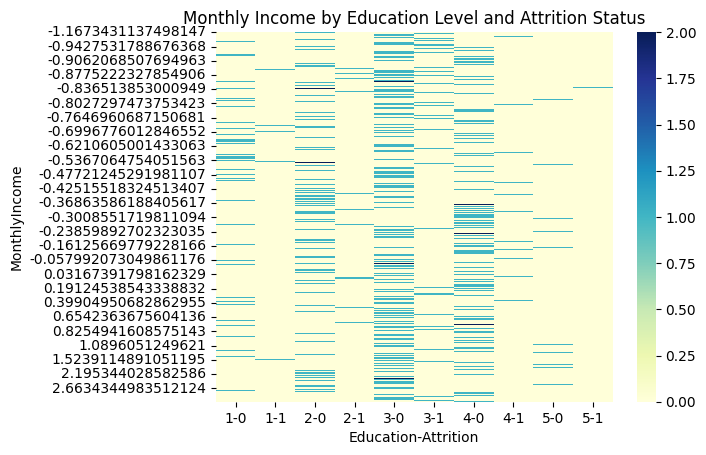

In [22]:
# MonthlyIncome by Education and Attrition
df_ct2 = pd.crosstab(df['MonthlyIncome'], [df['Education'], df['Attrition']])
sns.heatmap(df_ct2, cmap='YlGnBu')
plt.title('Monthly Income by Education Level and Attrition Status')
plt.show()

People with 3rd level education and smaller salary feel attrition more often.

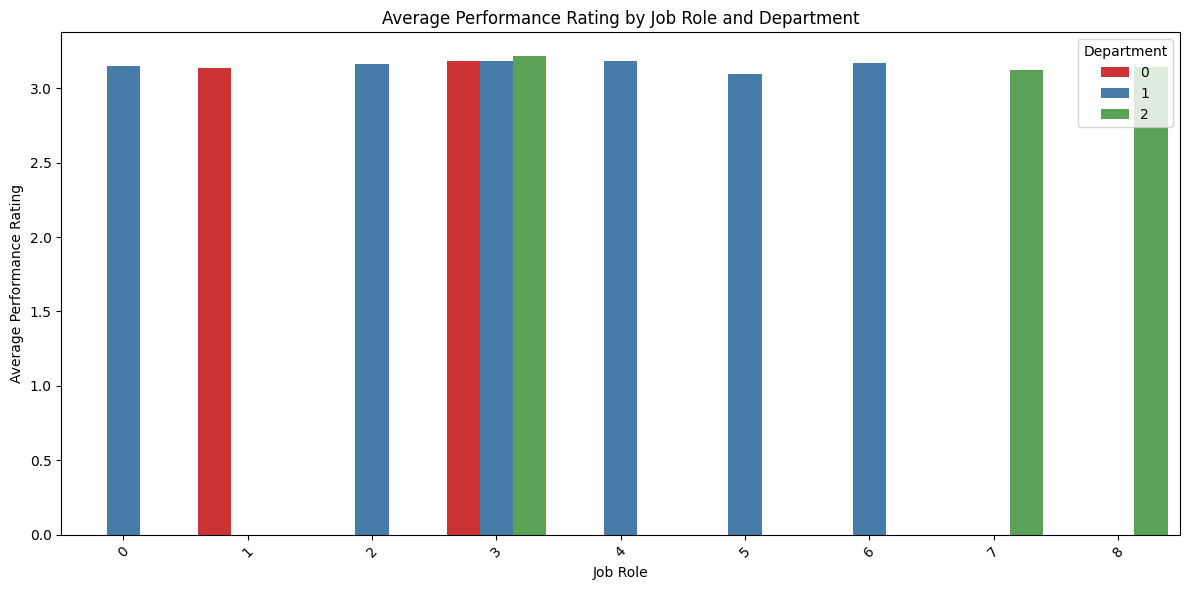

In [23]:
# Updated Barplot: Average Performance Rating by Job Role and Department
plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='PerformanceRating', hue='Department', data=df, errorbar=None, palette='Set1')
plt.title('Average Performance Rating by Job Role and Department')
plt.xlabel('Job Role')
plt.ylabel('Average Performance Rating')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


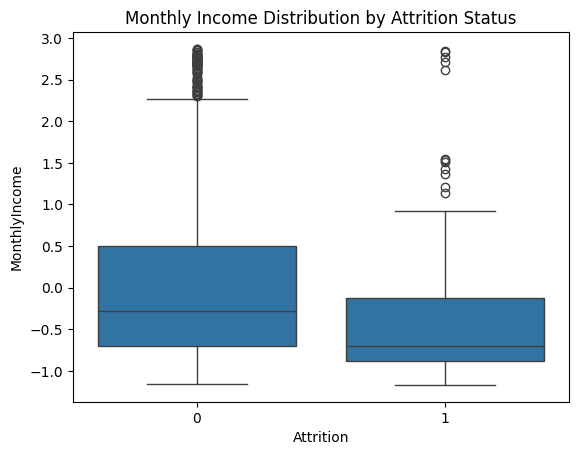

In [24]:
# Distribution of Monthly Income by Attrition Status
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition Status')
plt.show()

We can see, that people with smaller income feel more attrition. Most part of them don't even earn a mean of salary of people without attrition. But there are many outliers in all the salary levels.

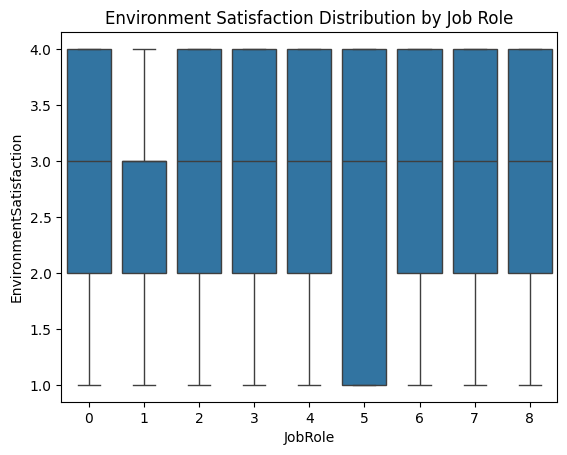

In [25]:
# Distribution of Environment Satisfaction by Job Role
sns.boxplot(x='JobRole', y='EnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction Distribution by Job Role')
plt.show()

Hrs and Laboratory directors are less satisfied with their working environment

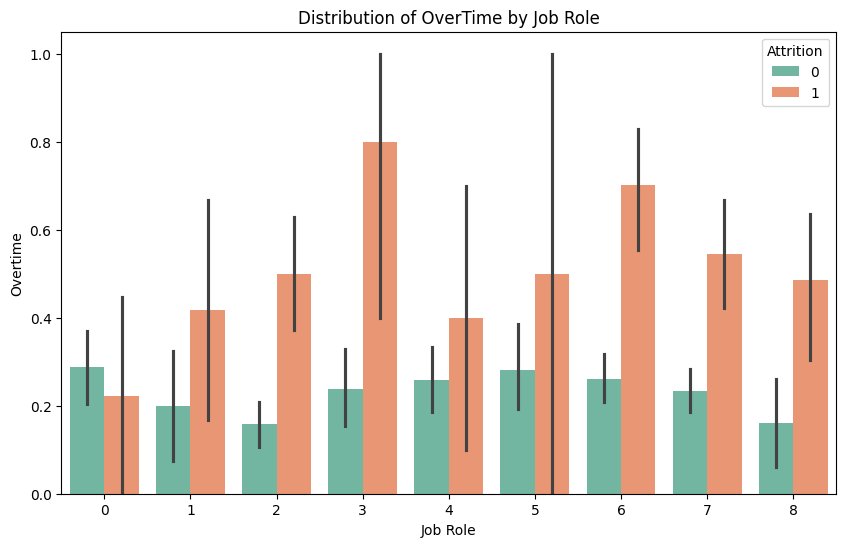

In [26]:
# Distribution of OverTime by Job Role

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='JobRole', y='OverTime', hue='Attrition', data=df, palette='Set2')

plt.title('Distribution of OverTime by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Overtime')
plt.legend(title='Attrition')

plt.show()

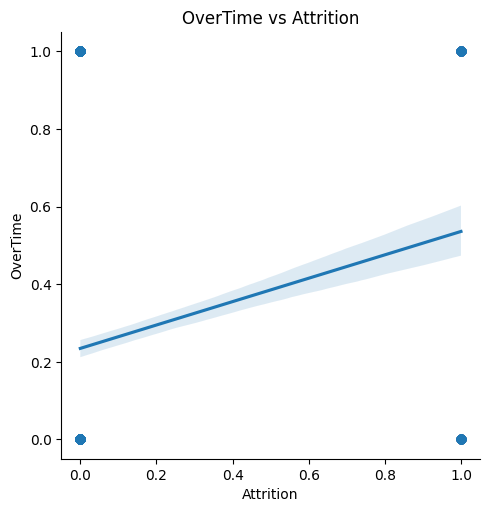

In [27]:
# Overtime and Attrition
sns.lmplot(x='Attrition', y='OverTime', data=df)
plt.title('OverTime vs Attrition')
plt.show()

We can see a positive correlation between overtime, that people are working and attrition.

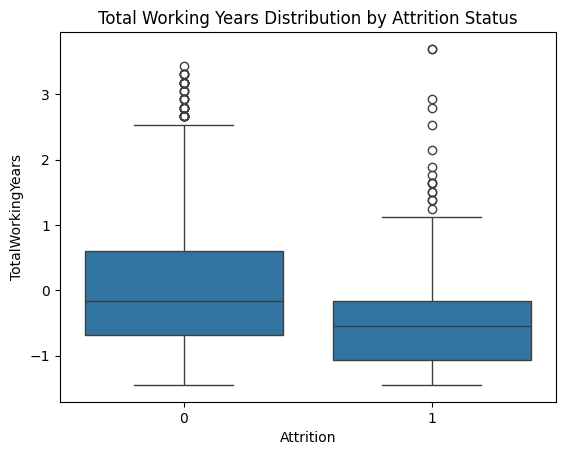

In [28]:
# Distribution of Total Working Years by Attrition Status
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Total Working Years Distribution by Attrition Status')
plt.show()

We can see, that more experienced workers generally feel less attrition.



